In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dframe1 = pd.read_csv('Train.csv')
dframe2 = pd.read_csv('test.csv')

In [3]:
dframe1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
dframe1.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
dframe2.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [6]:
#Fill missing value by average
dframe1['Item_Weight'].fillna(value=dframe1['Item_Weight'].mean(),inplace=True)
dframe2['Item_Weight'].fillna(value=dframe2['Item_Weight'].mean(),inplace=True)

#Filling null values by unknown
dframe1['Outlet_Size'].fillna(value='Unknown',inplace=True)
dframe2['Outlet_Size'].fillna(value='Unknown',inplace=True)

In [7]:
dframe1.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [8]:
dframe1.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Item_Type:
 Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


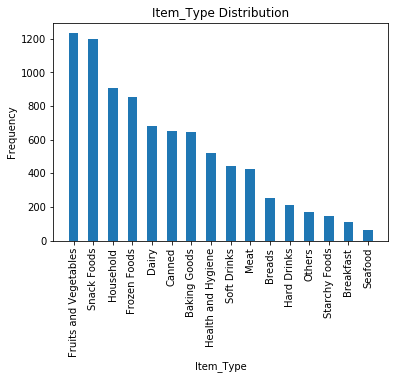

In [9]:
dframe1['Item_Type'].value_counts()
import numpy as np
import matplotlib.pyplot as plt
plt.bar(dframe1['Item_Type'].value_counts().index, dframe1['Item_Type'].value_counts(), width=0.5, bottom=None, align='center', data=dframe1)
plt.title('Item_Type Distribution')
plt.xticks(rotation=90)
plt.xlabel('Item_Type')
plt.ylabel('Frequency')
print('Item_Type:\n',dframe1['Item_Type'].value_counts())

In [10]:
#Item_Type is written in expanded form 
def item_identify(cols):
    item_id=cols[0]
    item_type=cols[1]
  
    if item_id[:2] == 'NC':
        return 'Non Consumables'
    elif item_id[:2] == 'DR':
        return 'Drinks'
    else:
        return 'Foods'

In [11]:
dframe1['Item_Type']=dframe1[['Item_Identifier','Item_Type']].apply(item_identify,axis=1)
dframe2['Item_Type']=dframe2[['Item_Identifier','Item_Type']].apply(item_identify,axis=1)

In [12]:
dframe1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Foods,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Foods,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Foods,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Non Consumables,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Item_Type:
 Foods              6125
Non Consumables    1599
Drinks              799
Name: Item_Type, dtype: int64


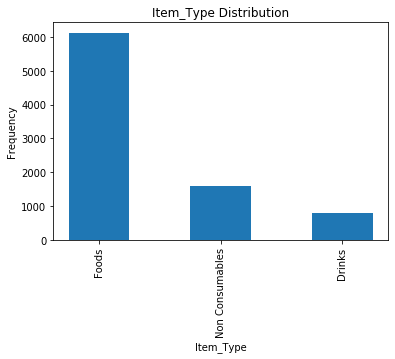

In [13]:
dframe1['Item_Type'].value_counts()
plt.bar(dframe1['Item_Type'].value_counts().index, dframe1['Item_Type'].value_counts(), width=0.5, bottom=None, align='center', data=dframe1)
plt.title('Item_Type Distribution')
plt.xticks(rotation=90)
plt.xlabel('Item_Type')
plt.ylabel('Frequency')
print('Item_Type:\n',dframe1['Item_Type'].value_counts())

Item_Fat_Content:
 Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


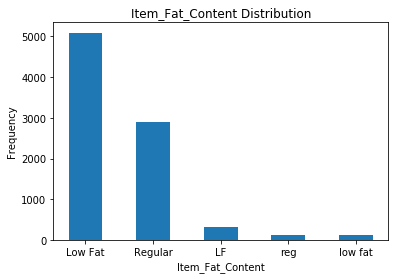

In [14]:
plt.bar(dframe1['Item_Fat_Content'].value_counts().index, dframe1['Item_Fat_Content'].value_counts(), width=0.5, bottom=None, align='center', data=dframe1)
plt.title('Item_Fat_Content Distribution')
plt.xlabel('Item_Fat_Content')
plt.ylabel('Frequency')
print('Item_Fat_Content:\n',dframe1['Item_Fat_Content'].value_counts())

In [15]:
#From above graph we can ses that there are two classes of data in Item_Fat_Content. There are also some unconsumables.
def item_fat(cols):
    fat=cols[0]
    typ=cols[1]
  
    if (fat=='Low Fat' or fat=='LF' or fat=='low fat') and (typ=='Foods' or typ=='Drinks'):
        return 'Low Fat'
    elif (fat=='Regular' or fat=='reg') and (typ=='Foods' or typ=='Drinks'):
        return 'Regular'
    else:
        return 'Non Edible'

In [16]:
dframe1['Item_Fat_Content']=dframe1[['Item_Fat_Content','Item_Type']].apply(item_fat,axis=1)
dframe2['Item_Fat_Content']=dframe2[['Item_Fat_Content','Item_Type']].apply(item_fat,axis=1)

Item_Fat_Content:
 Low Fat       3918
Regular       3006
Non Edible    1599
Name: Item_Fat_Content, dtype: int64


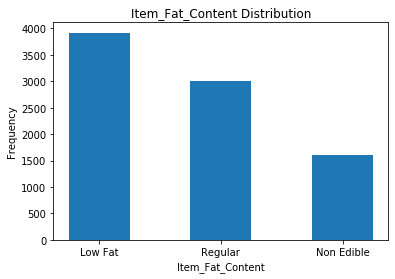

In [17]:
plt.bar(dframe1['Item_Fat_Content'].unique(), dframe1['Item_Fat_Content'].value_counts(), width=0.5, bottom=None, align='center', data=dframe1)
plt.title('Item_Fat_Content Distribution')
plt.xlabel('Item_Fat_Content')
plt.ylabel('Frequency')
print('Item_Fat_Content:\n',dframe1['Item_Fat_Content'].value_counts())

Text(0, 0.5, 'Frequency')

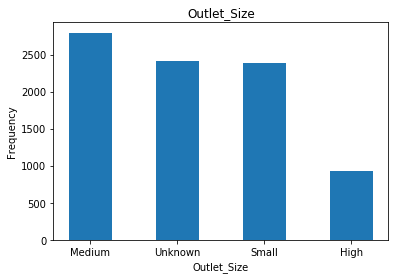

In [18]:
dframe1['Outlet_Size'].value_counts()
plt.bar(dframe1['Outlet_Size'].value_counts().index, dframe1['Outlet_Size'].value_counts(), width=0.5, bottom=None, align='center', data=dframe1)
plt.title('Outlet_Size')
plt.xlabel('Outlet_Size')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

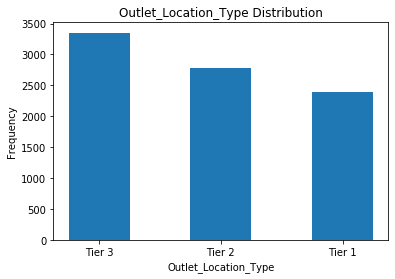

In [19]:
dframe1['Outlet_Location_Type'].value_counts()
plt.bar(dframe1['Outlet_Location_Type'].value_counts().index, dframe1['Outlet_Location_Type'].value_counts(), width=0.5, bottom=None, align='center', data=dframe1)
plt.title('Outlet_Location_Type Distribution')
plt.xlabel('Outlet_Location_Type')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

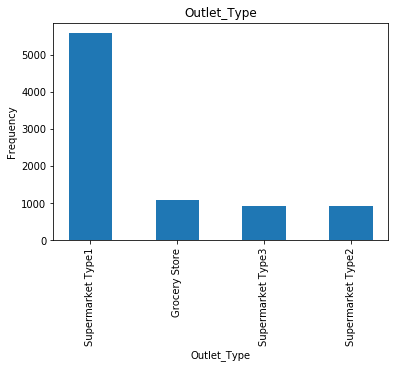

In [20]:
dframe1['Outlet_Type'].value_counts()
plt.bar(dframe1['Outlet_Type'].value_counts().index, dframe1['Outlet_Type'].value_counts(), width=0.5, bottom=None, align='center', data=dframe1)
plt.title('Outlet_Type')
plt.xticks(rotation=90)
plt.xlabel('Outlet_Type')
plt.ylabel('Frequency')

In [22]:
dframe1['Item_Visibility'].value_counts().head(3)

0.000000    526
0.076975      3
0.041283      2
Name: Item_Visibility, dtype: int64

In [23]:
#The column 'Item_Visibility' has lots of 0 values.
#Removing those by mean value
dframe1['Item_Visibility'].mask(dframe1['Item_Visibility']== 0,dframe1['Item_Visibility'].mean(),inplace=True)
dframe2['Item_Visibility'].mask(dframe2['Item_Visibility']== 0,dframe2['Item_Visibility'].mean(),inplace=True)

In [25]:
#A new feature that would have the time for which the outlet has been in operation till 2013.
def num_years(col):
    return 2013-col

In [27]:
dframe1['Years_of_Operation']=dframe1['Outlet_Establishment_Year'].apply(num_years)
dframe2['Years_of_Operation']=dframe2['Outlet_Establishment_Year'].apply(num_years)

In [28]:
item_fat_content=pd.get_dummies(dframe1['Item_Fat_Content'])
item_type=pd.get_dummies(dframe1['Item_Type'])
outlet_size=pd.get_dummies(dframe1['Outlet_Size'])
outlet_location_type=pd.get_dummies(dframe1['Outlet_Location_Type'])
output_type=pd.get_dummies(dframe1['Outlet_Type'])

item_fat_content_test=pd.get_dummies(dframe2['Item_Fat_Content'])
item_type_test=pd.get_dummies(dframe2['Item_Type'])
outlet_size_test=pd.get_dummies(dframe2['Outlet_Size'])
outlet_location_type_test=pd.get_dummies(dframe2['Outlet_Location_Type'])
output_type_test=pd.get_dummies(dframe2['Outlet_Type'])

In [29]:
train=dframe1
train=pd.concat([train,item_fat_content,item_type,outlet_size,outlet_location_type,output_type],axis=1)
train.drop(['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size', 'Outlet_Location_Type','Outlet_Type'],axis=1,inplace=True)

test=dframe2
test=pd.concat([test,item_fat_content_test,item_type_test,outlet_size_test,outlet_location_type_test,output_type_test],axis=1)
test.drop(['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],axis=1,inplace=True)

In [30]:
x=train.drop(['Item_Outlet_Sales'],axis=1)
y=train['Item_Outlet_Sales']
x_test=test

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.1,random_state=42)

# Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
predictions=lm.predict(x_val)

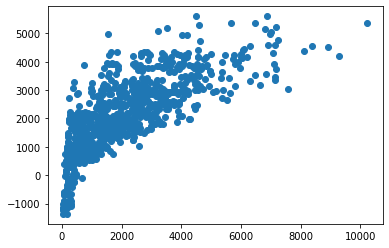

In [34]:
plt.scatter(y_val,predictions)

In [35]:
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_val,predictions))
print('Mean Squared Error: ',metrics.mean_squared_error(y_val,predictions))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_val,predictions)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_val,predictions))

Mean Absolute Error:  805.0381646347532
Mean Squared Error:  1179621.8288586289
Root Mean Squared Error:  1086.1039677943493
Explained Variance Score:  0.5781455605043511


# Random Forest

In [36]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=76,n_jobs=4)
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=76, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=4,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [37]:
predictions1=rf.predict(x_val)

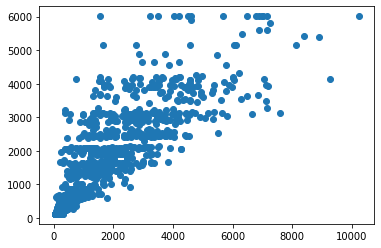

In [38]:
plt.scatter(y_val,predictions1)

In [39]:
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_val,predictions1))
print('Mean Squared Error: ',metrics.mean_squared_error(y_val,predictions1))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_val,predictions1)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_val,predictions1))

Mean Absolute Error:  720.9438920701365
Mean Squared Error:  1059620.1687730458
Root Mean Squared Error:  1029.378535220667
Explained Variance Score:  0.621004988652254
